<a href="https://colab.research.google.com/github/diogosaucedo/Praticas-de-IA/blob/main/MLP_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando as bibliotecas necessarias

In [ ]:
# Carregando dependencias
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

## ETL

In [ ]:
# Lendo dataframe e pulando a primeira linha
dataframe = pd.read_excel("lista-de-comprasSupermercado.xlsx",skiprows=1) 


In [ ]:
"""
O Produto que desejo aplicar regressão linear que é o arroz, e se contra na linha
27(tendo em vista que a contagem de linhas começa de 0)
"""
arroz = pd.DataFrame(dataframe.iloc[[27]])
# Elimino linhas que não serão uteis
arroz = arroz.drop(columns=['Unnamed: 0', 'Itens', 'unidade'])
"""
Nosso objetivo é calcular a quantidade de arroz que sera comprado daqui a 
4 dias, tendo em vista o valor esta na mesma linha, iremos deslocar 4 colunas 
para a esquerda 
"""
target = arroz.shift(-4, axis=1)


"""
O deslocamento de colunas faz com que os ultimos 4 valores fiquem como "NaN"
Para resolver isso e demais problemas dentro dos dados iremos prencher os
campos vazios com valores dos campos proximos.
"""
target.fillna(method="ffill", inplace= True, axis=1)
target.fillna(method="bfill", inplace= True, axis=1)
arroz = arroz.values[0]
target = target.values[0]
X = []
y = []
# fazendo agrupamento de dados para entradas
for i in range(len(arroz)-4):
  X.append(list(arroz[i:i+4]))
  y.append(target[i])
print(X) # mostrando entradas
print(y) # mostrando o valor comprado 4 dias depois

# separando as amostras de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

[[1.0, 0.0, 4.0, 1.0], [0.0, 4.0, 1.0, 3.0], [4.0, 1.0, 3.0, 3.0], [1.0, 3.0, 3.0, 2.0], [3.0, 3.0, 2.0, 8.0], [3.0, 2.0, 8.0, 4.0], [2.0, 8.0, 4.0, 4.0], [8.0, 4.0, 4.0, 3.0], [4.0, 4.0, 3.0, 5.0], [4.0, 3.0, 5.0, 5.0], [3.0, 5.0, 5.0, 6.0], [5.0, 5.0, 6.0, 8.0], [5.0, 6.0, 8.0, 3.0], [6.0, 8.0, 3.0, 6.0], [8.0, 3.0, 6.0, 3.0], [3.0, 6.0, 3.0, 8.0], [6.0, 3.0, 8.0, 5.0], [3.0, 8.0, 5.0, 7.0], [8.0, 5.0, 7.0, 2.0], [5.0, 7.0, 2.0, 4.0], [7.0, 2.0, 4.0, 6.0], [2.0, 4.0, 6.0, 5.0], [4.0, 6.0, 5.0, 8.0], [6.0, 5.0, 8.0, 3.0], [5.0, 8.0, 3.0, 4.0], [8.0, 3.0, 4.0, 5.0], [3.0, 4.0, 5.0, 0.0], [4.0, 5.0, 0.0, 1.0], [5.0, 0.0, 1.0, 3.0], [0.0, 1.0, 3.0, 1.0], [1.0, 3.0, 1.0, 6.0], [3.0, 1.0, 6.0, 0.0], [1.0, 6.0, 0.0, 2.0], [6.0, 0.0, 2.0, 4.0], [0.0, 2.0, 4.0, 5.0], [2.0, 4.0, 5.0, 6.0], [4.0, 5.0, 6.0, 5.0], [5.0, 6.0, 5.0, 2.0], [6.0, 5.0, 2.0, 8.0], [5.0, 2.0, 8.0, 5.0], [2.0, 8.0, 5.0, 6.0], [8.0, 5.0, 6.0, 0.0], [5.0, 6.0, 0.0, 5.0], [6.0, 0.0, 5.0, 1.0], [0.0, 5.0, 1.0, 1.0], [5.0, 1.0

## MLP

In [ ]:
# criando modelo
model = Sequential()
model.add(Dense(48, input_shape=(4,), activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='linear'))

# configurando modelo e treinando
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
model.fit(X_train, y_train, batch_size=1, verbose=1,epochs=1000)

Epoch 1/1000
207/207 [==============================] - 1s 1ms/step - loss: 2.3383 - mean_squared_error: 8.0843
Epoch 2/1000
207/207 [==============================] - 0s 1ms/step - loss: 2.1451 - mean_squared_error: 6.7199
Epoch 3/1000
207/207 [==============================] - 0s 1ms/step - loss: 2.0839 - mean_squared_error: 6.4273
Epoch 4/1000
207/207 [==============================] - 0s 1ms/step - loss: 2.0530 - mean_squared_error: 6.3324
Epoch 5/1000
207/207 [==============================] - 0s 1ms/step - loss: 2.0267 - mean_squared_error: 6.1692
Epoch 6/1000
207/207 [==============================] - 0s 1ms/step - loss: 2.0352 - mean_squared_error: 6.2379
Epoch 7/1000
207/207 [==============================] - 0s 1ms/step - loss: 2.0403 - mean_squared_error: 6.2015
Epoch 8/1000
207/207 [==============================] - 0s 1ms/step - loss: 2.0623 - mean_squared_error: 6.3016
Epoch 9/1000
207/207 [==============================] - 0s 1ms/step - loss: 2.0106 - mean_squared_error:

In [ ]:
predictions = model.predict(X_test) # fazendo as predições

## Conferindo resultados

In [ ]:
import matplotlib.pyplot as plt

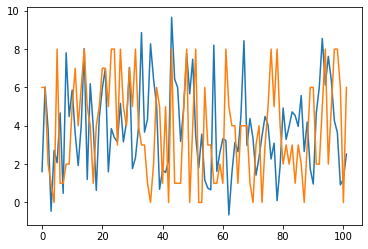

In [ ]:
#plotando as predições e os valores reais
plt.plot(predictions )
plt.plot(y_test)
plt.show()

## Considerações Finais

Após exaustivos testes este foi o melhor resultado obtido com esta rede e estes dados. Para uma melhor acuracia, poderia ser feito uma normalização de dados, feature selection com base em novos indicadores e um estudo para escolher melhor os parametros de configuração rede. 

O material de apoio para a construção desta rede esta disponivel em: https://www.machinecurve.com/index.php/2019/07/30/creating-an-mlp-for-regression-with-keras/